2020-09-25

## 복습

In [8]:
# 주피터 익스텐션 설치
# pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install
# => Table of Contents, Variable Inspector
# 보고서 작성용으로 주피터 노트북 사용 많이 함 (ex: 버거지수 분석)

## Kaggle 타이타닉 데이터 분석 (계속)

### 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# 한글깨짐 및 음수표시를 위한 세팅
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus']=False

### 데이터 가져오기

In [3]:
path = r'C:\Users\cypark\Desktop\실습자료\GBS Python 자료\회귀분석&머신러닝 용 데이터\캐글 타이타닉\test.csv'
test = pd.read_csv(path, engine = 'python')

path = r'C:\Users\cypark\Desktop\실습자료\GBS Python 자료\회귀분석&머신러닝 용 데이터\캐글 타이타닉\train.csv'
train = pd.read_csv(path, engine = 'python')

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.isna().sum() / len(test) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [9]:
train.isna().sum() / len(train) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## train set 과 test set 합치기
- concat 사용
- index 주의 : reset_index(drop=True)

In [13]:
total = pd.concat([train, test], sort=False).reset_index(drop=True)

In [18]:
total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
total.isna().sum() / len(total) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [17]:
total.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 결측 데이터 채우기
- 빈 데이터에 무엇이 들어갈지 예측하는 것

### Embarked : 탑승 항구

#### data 자체를 보기

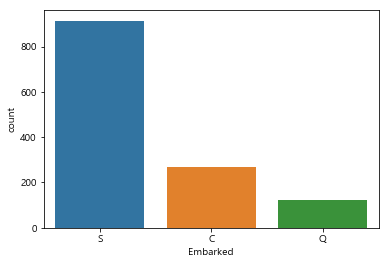

In [21]:
# 카테고리 데이터의 분포를 보자
sns.countplot(data = total, x='Embarked')

# 단순한 방법 : 최빈도 값으로 채우기

#### 다른 데이터와의 관계를 통해 예측

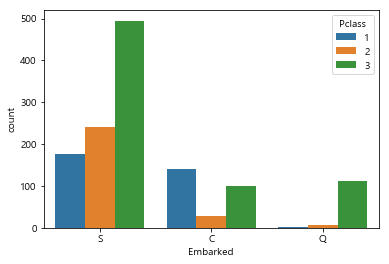

In [22]:
sns.countplot(data = total, x='Embarked', hue='Pclass')

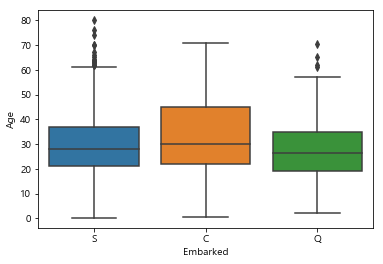

In [23]:
sns.boxplot(data = total, x='Embarked', y='Age')

#### 데이터 채우기

In [24]:
total.loc[ total['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [26]:
total.loc[ total['Embarked'].isna(), 'Embarked' ] = 'S'

In [28]:
total.isna().sum() / len(total) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.000000
dtype: float64

### Fare : 요금
- 결측데이터와 함께 이상치도 확인하자 (like 0원)

#### data 자체를 보기
- 연속되는 숫자데이터는 평균 또는 중앙값으로 전체를 대표시킴

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


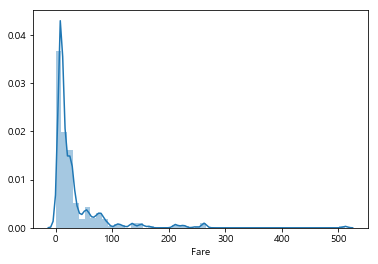

In [30]:
# 숫자데이터의 분포를 보자
sns.distplot(total['Fare'].dropna())

In [32]:
# 이상치 확인
total['Fare'].describe()  # 최소값에 0원이 있다

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

#### 다른 데이터와의 관계를 통해 예측

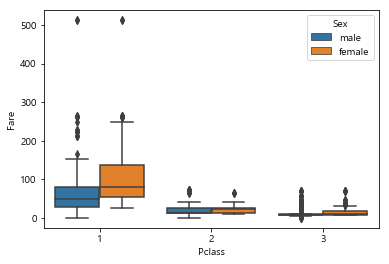

In [34]:
sns.boxplot(data = total, x='Pclass', y='Fare', hue='Sex') # 클래스와 성별에 따라 요금 차이가 난다

In [37]:
total.groupby( ['Pclass', 'Sex']).median() # 중앙값을 보자

PassengerId  Survived   Age  SibSp  Parch      Fare
Pclass Sex                                                        
1      female          710       1.0  36.0      0      0  80.92915
       male            648       0.0  42.0      0      0  49.50420
2      female          589       1.0  28.0      0      0  23.00000
       male            715       0.0  29.5      0      0  13.00000
3      female          637       0.5  22.0      0      0  10.48960
       male            649       0.0  25.0      0      0   7.89580

#### 데이터 채우기 (결측 데이터)

In [38]:
total.loc[ total['Fare'].isna() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [39]:
total.loc[ total['Fare'].isna(), 'Fare' ] = 7.89580

#### 데이터 채우기 (이상치)

In [40]:
total.loc[ total['Fare'] == 0 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [44]:
# female 의 경우 이상치 없음. male만 채우자.
total.loc[ (total['Fare'] == 0) & (total['Pclass'] ==  1) & (total['Sex'] == 'male')  ]
total.loc[ (total['Fare'] == 0) & (total['Pclass'] ==  2) & (total['Sex'] == 'male')  ]
total.loc[ (total['Fare'] == 0) & (total['Pclass'] ==  3) & (total['Sex'] == 'male')  ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [45]:
total.loc[ (total['Fare'] == 0) & (total['Pclass'] ==  1) & (total['Sex'] == 'male') , 'Fare' ] = 49.50420
total.loc[ (total['Fare'] == 0) & (total['Pclass'] ==  2) & (total['Sex'] == 'male') , 'Fare' ] = 13.00000
total.loc[ (total['Fare'] == 0) & (total['Pclass'] ==  3) & (total['Sex'] == 'male') , 'Fare' ] = 7.89580

### Age : 나이

#### data 자체를 보기

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


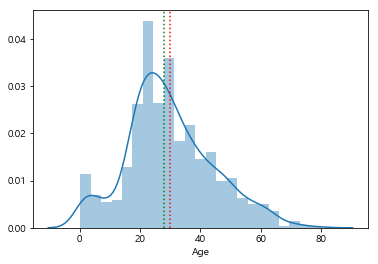

In [48]:
sns.distplot(total['Age'].dropna())
plt.axvline(total['Age'].mean(), color='red', ls=':')
plt.axvline(total['Age'].median(), color='green', ls=':')

#### 다른 데이터와의 관계를 통해 예측

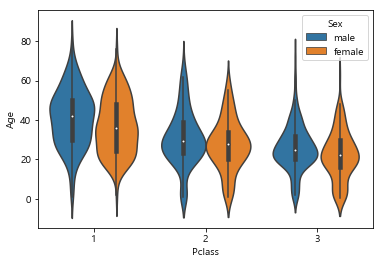

In [51]:
sns.violinplot(data = total, x='Pclass', y='Age', hue='Sex') # 클래스가 올라갈수록 나이가 많음. 남자가 여자보다 나이가 많음

In [53]:
total.groupby( ['Pclass', 'Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   689.652778  0.968085  37.037594  0.555556  0.472222   
       male     658.687151  0.368852  41.029272  0.340782  0.279330   
2      female   632.188679  0.921053  27.499223  0.500000  0.650943   
       male     695.976608  0.157407  30.815380  0.327485  0.192982   
3      female   628.393519  0.500000  22.185329  0.791667  0.731481   
       male     645.888438  0.135447  25.962264  0.470588  0.255578   

                     Fare  
Pclass Sex                 
1      female  109.412385  
       male     71.824303  
2      female   23.234827  
       male     20.361086  
3      female   15.324250  
       male     12.470358

In [55]:
total.loc[ (total['Age'].isna()) & (total['Pclass'] == 1) & (total['Sex'] == 'female'), 'Age'] = 37.037594
total.loc[ (total['Age'].isna()) & (total['Pclass'] == 2) & (total['Sex'] == 'female'), 'Age'] = 27.499223
total.loc[ (total['Age'].isna()) & (total['Pclass'] == 3) & (total['Sex'] == 'female'), 'Age'] = 22.185329
total.loc[ (total['Age'].isna()) & (total['Pclass'] == 1) & (total['Sex'] == 'male'), 'Age'] = 41.029272
total.loc[ (total['Age'].isna()) & (total['Pclass'] == 2) & (total['Sex'] == 'male'), 'Age'] = 30.815380
total.loc[ (total['Age'].isna()) & (total['Pclass'] == 3) & (total['Sex'] == 'male'), 'Age'] = 25.962264

In [56]:
total.isna().sum() / len(total) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.463713
Embarked        0.000000
dtype: float64

## Feture Engineering
- model 의 성능을 향상시키기 위해 특성 데이터를 가공하는 것
- target 데이터와의 관계를 고려한다

In [57]:
total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 카테고리 데이터 가공
- Pclass, Sex, Embarked는 적당한 개수이므로 나중에 한꺼번에 encoding

#### Name

In [60]:
# Name을 카테고리 데이터로 만들자 => 호칭부분만 분리하자
total['Name_1'] = total['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

In [62]:
total['Name_1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

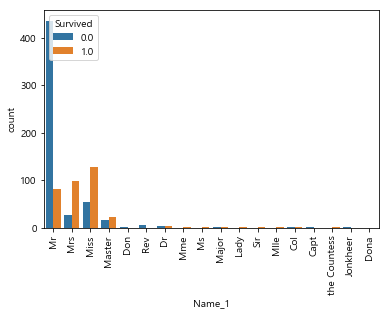

In [68]:
sns.countplot(data = total, x='Name_1', hue='Survived')
plt.xticks(rotation=90)

In [63]:
# 카테고리 종류가 너무 많으면 모델 성능이 떨어진다. 종류를 단축하여 매핑하자
name_map = {'Mr' : 'Mr', 'Mrs' : 'Wo', 'Miss' : 'Wo', 'Master' : 'Master', 
 'Don' : 'etc', 'Rev' : 'etc', 'Dr' : 'etc', 'Mme' : 'Wo', 'Ms' : 'Wo',
 'Major' : 'etc', 'Lady' : 'Wo', 'Sir' : 'etc', 'Mlle' : 'Wo', 'Col' : 'etc', 
 'Capt' : 'etc', 'the Countess' : 'etc', 'Jonkheer' : 'etc', 'Dona' : 'etc'}

total['Name_2'] = total['Name_1'].map(name_map)

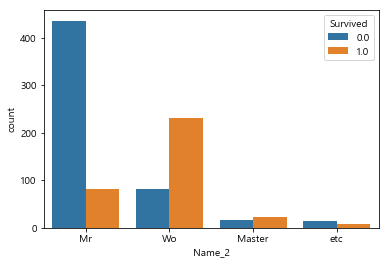

In [65]:
sns.countplot(data = total, x='Name_2', hue='Survived')  # 여자가 남자보다 생존 확률이 높다. 남자 중 master는 생존 확률이 높은 편이다.

#### Family

In [69]:
total['Family'] = total['SibSp'] + total['Parch']

In [70]:
total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_1,Name_2,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Wo,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Wo,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Wo,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0


In [71]:
total['Family'].unique()  # Family 는 카테고리 데이터다

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

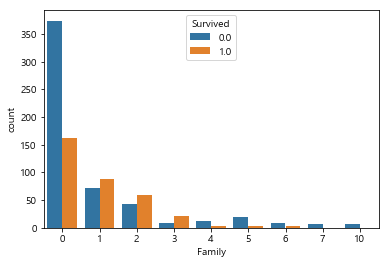

In [72]:
sns.countplot(data = total, x='Family', hue='Survived')

In [73]:
# 카테고리 종류가 너무 많으면 모델 성능이 떨어진다. 종류를 단축하여 매핑하자
family_map = {0:'alone', 1:'small_f', 2:'small_f', 3:'small_f', 4:'big_f', 5:'big_f', 6:'big_f', 7:'big_f', 10:'big_f'}

total['Family_1'] = total['Family'].map(family_map)

In [74]:
total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_1,Name_2,Family,Family_1
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,1,small_f
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Wo,1,small_f
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Wo,0,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Wo,1,small_f
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0,alone


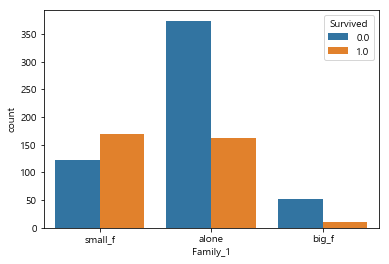

In [75]:
sns.countplot(data = total, x='Family_1', hue='Survived') # 2 ~ 4 명 단위 가족이 생존할 확률이 높다

### 데이터 스케일링 - Min-Max Scaling
- 전체 데이터의 크기 범위를 고르게 맞추기 위해, 기존 데이터를 특정 범위의 값으로 치환

#### Age

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


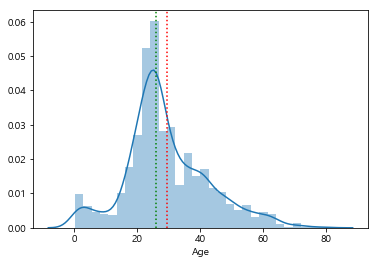

In [77]:
sns.distplot(total['Age'])
plt.axvline(total['Age'].mean(), color='red', ls=':')
plt.axvline(total['Age'].median(), color='green', ls=':')

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 22)

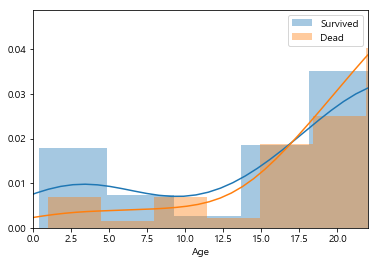

In [89]:
sns.distplot(total[total['Survived'] == 1]['Age'], label = 'Survived')
sns.distplot(total[total['Survived'] == 0]['Age'], label = 'Dead')
plt.legend()

plt.xlim(0, 22)

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(22, 30)

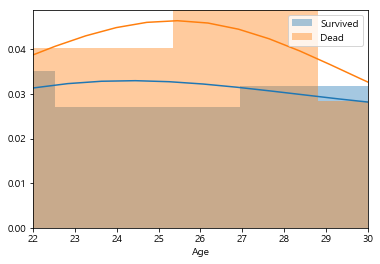

In [87]:
sns.distplot(total[total['Survived'] == 1]['Age'], label = 'Survived')
sns.distplot(total[total['Survived'] == 0]['Age'], label = 'Dead')
plt.legend()

plt.xlim(22, 30)

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(30, 50)

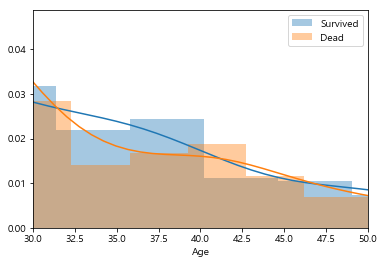

In [84]:
sns.distplot(total[total['Survived'] == 1]['Age'], label = 'Survived')
sns.distplot(total[total['Survived'] == 0]['Age'], label = 'Dead')
plt.legend()

plt.xlim(30, 50)

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(50, 80)

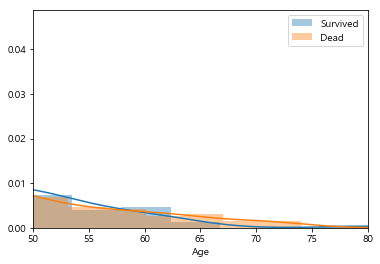

In [86]:
sns.distplot(total[total['Survived'] == 1]['Age'], label = 'Survived')
sns.distplot(total[total['Survived'] == 0]['Age'], label = 'Dead')
plt.legend()

plt.xlim(50, 80)

In [93]:
max_age = total['Age'].max()
min_age = total['Age'].min()

# ( total['Age'] - min_age ) / ( max_age - min_age )                       # 0 ~ 1 사이의 값
total['Age_1'] = ( total['Age'] - min_age ) / ( max_age - min_age ) * 3    # 0 ~ 3 사이의 값

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


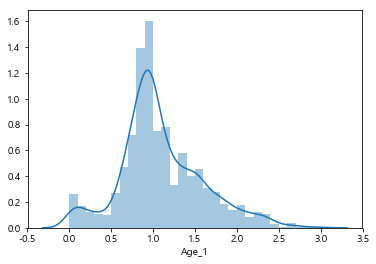

In [94]:
sns.distplot(total['Age_1'])

### 데이터 정규화 (Normalizing) - Log 변환
- 0값은 무한대가 되어버리니 주의

#### Fare

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


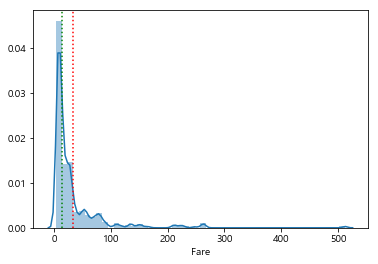

In [95]:
sns.distplot(total['Fare'])
plt.axvline(total['Fare'].mean(), ls = ':', c='red')
plt.axvline(total['Fare'].median(), ls = ':', c='green') # 데이터의 꼬리가 길다.

In [97]:
total['Fare_1'] = np.log(total['Fare'])

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


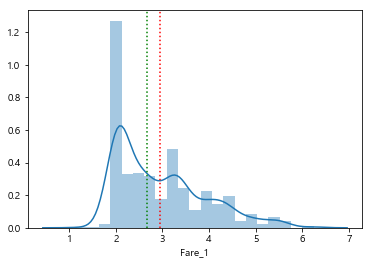

In [98]:
sns.distplot(total['Fare_1'])
plt.axvline(total['Fare_1'].mean(), ls = ':', c='red')
plt.axvline(total['Fare_1'].median(), ls = ':', c='green')

In [217]:
total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_1,Name_2,Family,Family_1,Age_1,Fare_1,Age_c
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,1,small_f,0.820368,1.981001,young
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Wo,1,small_f,1.421646,4.266662,middle
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Wo,0,alone,0.970688,2.070022,young
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Wo,1,small_f,1.308906,3.972177,middle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0,alone,1.308906,2.085672,middle


## 카테고리 데이터 인코딩 - OneHot Encoding
- 인코딩 : 카테고리 데이터를 숫자로 변경
- OneHot Encoding : pd.get_dummies()
- 단점 : 카테고리 개수만큼 컬럼이 늘어남 (카테고리 종류를 줄이는 게 중요)
- 카테고리 개수 3개 -> 2개의 컬럼으로 표현 가능 : drop_first=True

In [103]:
total.columns
total['Embarked'].unique()
# 인코딩 할 데이터 선정 : 'Pclass', 'Sex', 'Embarked', 'Name_2', 'Family_1'

array(['S', 'C', 'Q'], dtype=object)

In [105]:
# pd.get_dummies()
total_encoded = pd.get_dummies(total, columns=['Pclass', 'Sex', 'Embarked', 'Name_2', 'Family_1'], drop_first=True)

## 머신러닝 모델에 사용하기 위한 데이터로 분리

In [132]:
new_test = total_encoded[ total_encoded['Survived'].isna() ]

In [133]:
new_train = total_encoded[ total_encoded['Survived'].isna() == False ]

In [134]:
new_train.columns

x_names = ['Age_1', 'Fare_1', 'Pclass_2','Pclass_3', 'Sex_male', 'Embarked_Q',
                'Embarked_S', 'Name_2_Mr','Name_2_Wo', 'Name_2_etc', 'Family_1_big_f', 'Family_1_small_f']

train_x = new_train[x_names]
train_y = new_train['Survived']

test_x = new_test[x_names]

## 머신러닝 모델로 훈련 및 예측

### KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score   # 검증
from sklearn.model_selection import KFold             # 교차검증

In [136]:
# 10번 나누어 교차검증 => 81 %
kf = KFold(n_splits=10, shuffle=True, random_state=0)

knn = KNeighborsClassifier()
cross_val_score(knn, train_x, train_y, cv=kf).mean()

0.8114606741573033

In [137]:
# 최적의 n_neighbors 값 찾기
result = []

for i in range(3, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    temp = cross_val_score(knn, train_x, train_y, cv=kf).mean()
    result.append(temp)

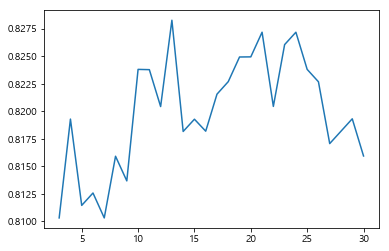

In [138]:
plt.plot(range(3, 31), result) # 대략 13일 때 가장 점수가 높다

In [142]:
# n_neighbors를 13으로 설정하여 다시 훈련
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [144]:
# 예측
knn_predict = knn.predict(test_x)

#### Kaggle 제출용 csv파일 만들기

In [149]:
# 검증 => Kaggle 에 제출 => .csv 파일로 만듦
knn_df = pd.DataFrame(test['PassengerId'])
knn_df['Survived'] = knn_predict.astype(int)  # float -> int

In [150]:
knn_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [152]:
knn_df.to_csv(r'C:\Users\cypark\Desktop\knn_predict.csv', index = False)

# Kaggle score : 0.76555

### SVM

In [163]:
# 10번 나누어 교차검증 => 83 %
kf = KFold(n_splits=10, shuffle=True, random_state=0)
svc = SVC()

svc_score = cross_val_score(svc, train_x, train_y, cv=kf)
avg_score = svc_score.mean()

svc_score, avg_score

(array([0.84444444, 0.80898876, 0.82022472, 0.82022472, 0.85393258,
        0.79775281, 0.82022472, 0.85393258, 0.82022472, 0.86516854]),
 0.8305118601747814)

In [156]:
svc = SVC()
svc.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [157]:
svc_predict = svc.predict(test_x)

In [159]:
svc_predict

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [160]:
svc_df = pd.DataFrame(test['PassengerId'])
svc_df['Survived'] = svc_predict.astype(int)  # float -> int

In [161]:
svc_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [162]:
svc_df.to_csv(r'C:\Users\cypark\Desktop\svc_predict.csv', index = False)

# Kaggle score : 0.77511

## 연속된 숫자데이터를 카테고리로 바꾸기

### Age

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


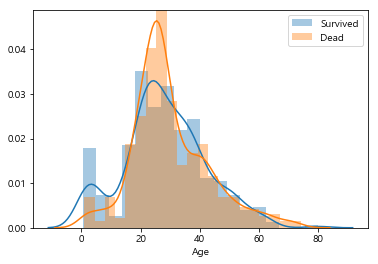

In [283]:
sns.distplot(total[total['Survived'] == 1]['Age'], label = 'Survived')
sns.distplot(total[total['Survived'] == 0]['Age'], label = 'Dead')
plt.legend()

#plt.xlim(0, 20)

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(20, 30)

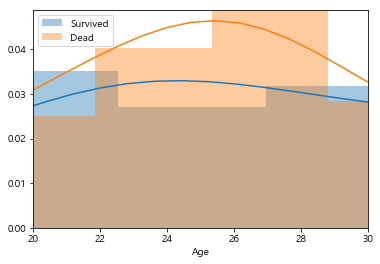

In [173]:
sns.distplot(total[total['Survived'] == 1]['Age'], label = 'Survived')
sns.distplot(total[total['Survived'] == 0]['Age'], label = 'Dead')
plt.legend()

plt.xlim(20, 30)

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(30, 60)

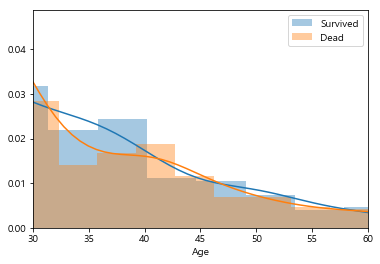

In [177]:
sns.distplot(total[total['Survived'] == 1]['Age'], label = 'Survived')
sns.distplot(total[total['Survived'] == 0]['Age'], label = 'Dead')
plt.legend()

plt.xlim(30, 60)

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(60, 80)

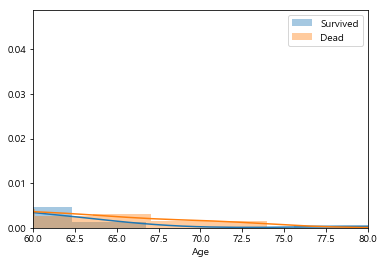

In [176]:
sns.distplot(total[total['Survived'] == 1]['Age'], label = 'Survived')
sns.distplot(total[total['Survived'] == 0]['Age'], label = 'Dead')
plt.legend()

plt.xlim(60, 80)

#### pd.cut() : 연속된 숫자데이터를 주어진 bin에 따라 자른다

In [233]:
# pd.cut ( 시리즈, bins = 범위를 담은 리스트, labels = 범위의 이름을 담은 리스트)

age_bins = [0, 20, 30, 60, 81]  # 범위
age_label = ['baby', 'young', 'middle', 'old']

total_encoded['Age_c'] = pd.cut( total_encoded['Age'], bins=age_bins, labels=age_label )

In [ ]:
total_encoded.head()

In [236]:
# encoding
total_encoded_2 = pd.get_dummies(total_encoded, columns=['Age_c'], drop_first=True)

total_encoded_2.head(1)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_1,...,Embarked_S,Name_2_Mr,Name_2_Wo,Name_2_etc,Family_1_big_f,Family_1_small_f,Fare_2,Age_c_young,Age_c_middle,Age_c_old
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,NaN,Mr,...,1,1,0,0,0,1,0.487918,1,0,0


In [279]:
total_encoded_2.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Name_1', 'Family', 'Age_1', 'Fare_1', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Name_2_Mr',
       'Name_2_Wo', 'Name_2_etc', 'Family_1_big_f', 'Family_1_small_f',
       'Fare_2', 'Age_c_young', 'Age_c_middle', 'Age_c_old'],
      dtype='object')

In [273]:
# train set, test, set

new_test_2 = total_encoded_2[ total_encoded_2['Survived'].isna() ]
new_train_2 = total_encoded_2[ total_encoded_2['Survived'].isna() == False ]

x_names_2 = [ 'Fare_1', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Name_2_Mr','Name_2_Wo', 'Name_2_etc', 'Embarked_Q', 'Embarked_S', 'Family_1_big_f', 'Family_1_small_f',
       'Age_c_young', 'Age_c_middle', 'Age_c_old' ]
train_x_2 = new_train_2[ x_names_2 ]
train_y_2 = new_train_2['Survived']

test_x_2 = new_test_2[x_names_2]

In [274]:
# cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)
svc = SVC()

svc_score = cross_val_score(svc, train_x_2, train_y_2, cv=kf)
avg_score = svc_score.mean()

svc_score, avg_score

(array([0.85555556, 0.7752809 , 0.82022472, 0.82022472, 0.84269663,
        0.79775281, 0.82022472, 0.84269663, 0.82022472, 0.86516854]),
 0.8260049937578028)

In [260]:
# training
kf = KFold(n_splits=10, shuffle=True, random_state=0)
svc = SVC()
svc.fit(train_x_2, train_y_2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [261]:
# predict

svc_predict_2 = svc.predict(test_x_2)

In [262]:
svc_df2 = pd.DataFrame(test['PassengerId'])
svc_df2['Survived'] = svc_predict_2.astype(int)  # float -> int

In [280]:
svc_df2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [281]:
svc_df2.to_csv(r'C:\Users\cypark\Desktop\svc_predict3.csv', index = False)   # 0.77511

In [282]:
# knn
kf = KFold(n_splits=10, shuffle=True, random_state=0)

knn = KNeighborsClassifier()
cross_val_score(knn, train_x_2, train_y_2, cv=kf).mean()

0.7990886392009988

## 회귀분석 (Linear Regression)

In [284]:
from sklearn.linear_model import LinearRegression

In [285]:
tip_df = sns.load_dataset('tips')

In [287]:
tip_df.head()

# target = tip => 숫자데이터

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


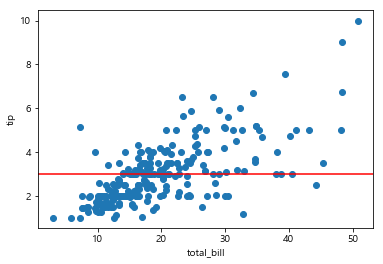

In [293]:
plt.scatter(tip_df['total_bill'], tip_df['tip'])
plt.xlabel('total_bill')
plt.ylabel('tip')

plt.axhline(tip_df['tip'].mean(), c='red')

In [295]:
tip_df['tip'].mean()   # 단순한 방법 : tip 의 평균치로 예측 => 단점 : 거리가 먼 점의 예측값의 정확률이 떨어짐

2.9982786885245902

In [296]:
# 단순한 방법의 단점을 개선하기 위해, 직선(평균치)가 아닌 점들을 따라가는 대각선을 그리도록 한다
# => 회귀선
#    => 실제 데이터들과의 오차가 가장 작은 선
#    => 기본적으로 오차가 있다고 가정. 정확한 값을 찾는 것은 아님.

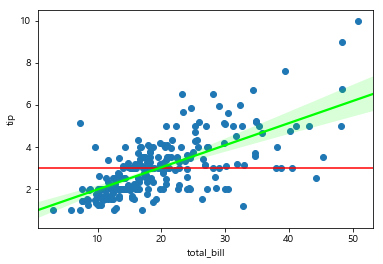

In [299]:
plt.scatter(tip_df['total_bill'], tip_df['tip'])
plt.xlabel('total_bill')
plt.ylabel('tip')

plt.axhline(tip_df['tip'].mean(), c='red')
sns.regplot(data=tip_df, x='total_bill', y='tip', color='lime', scatter=False)

In [307]:
lr = LinearRegression()

x = tip_df[['total_bill']]  # feature 는 값이 1개여도 2차원으로 세팅한다
y = tip_df['tip']

lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [310]:
lr.predict([ [20], [40], [50] ] )

array([3.02075996, 5.12125031, 6.17149548])

In [311]:
lr.score(x, y)

0.45661658635167657

In [312]:
# knn, svc의 score = accuracy = 전체 데이터 중 몇 개를 맞추었는가
# lr의 score = 정답에 얼마나 근접한가

In [313]:
# tip = 0.105 * total_bill + 0.92
lr.coef_

array([0.10502452])

In [314]:
lr.intercept_

0.9202696135546731

### 보스톤 집값 분석하기

In [315]:
from sklearn.datasets import load_boston

In [316]:
boston_data = load_boston()

In [319]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [320]:
boston_data['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [321]:
boston_data['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [322]:
boston_x = pd.DataFrame( boston_data['data'], columns=boston_data['feature_names'])

In [323]:
boston_y = boston_data['target']

In [324]:
boston_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [325]:
print(boston_data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [335]:
lr = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=0)

cross_val_score(lr, boston_x, boston_y, cv=kf).mean()

0.7026511728012712

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
train_x, test_x, train_y, test_y = train_test_split(boston_x, boston_y, shuffle=True, random_state=0, test_size=0.2)

In [330]:
train_x  # 403 개

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
366,3.69695,0.0,18.10,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
302,0.09266,34.0,6.09,0.0,0.433,6.495,18.4,5.4917,7.0,329.0,16.1,383.61,8.67
157,1.22358,0.0,19.58,0.0,0.605,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59
408,7.40389,0.0,18.10,0.0,0.597,5.617,97.9,1.4547,24.0,666.0,20.2,314.64,26.40


In [334]:
lr = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=0)

cross_val_score(lr, train_x, train_y, cv=kf).mean()

0.7404741958483525

In [336]:
lr = LinearRegression()
lr.fit(train_x, train_y)

lr.score(test_x, test_y)   # over fitting (훈련용 데이터에만 맞추어져 있어, 새로운 데이터가 오면 예측하지 못 함 / 암기만 잘하고 응용을 못 함)

0.5892011519186435

In [337]:
boston_x  # 회귀분석은 특성값이 추가되면 score가 무조건 오른다. 하지만 특성값이 의미없다면 예측 결과는 좋지 못함.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [339]:
boston_x['target'] = boston_y

In [358]:
b_crr = boston_x.corr()

### corr() 이용해서 관련도 높은 feature 값 찾기

In [359]:
b_crr['target']  # 1또는 -1 에 가까울수록 관련도가 높다

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
target     1.000000
Name: target, dtype: float64

In [362]:
abs_crr = b_crr['target'].apply(abs)  # 절대값으로 바꾸자

In [363]:
abs_crr.sort_values()

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.385832
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
target     1.000000
Name: target, dtype: float64

In [366]:
abs_crr[abs_crr > 0.5]

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
target     1.000000
Name: target, dtype: float64

In [367]:
new_x = boston_x[['RM', 'PTRATIO', 'LSTAT']]

In [368]:
train_x, test_x, train_y, test_y = train_test_split(new_x, boston_y, shuffle=True, random_state=0, test_size=0.25)

In [369]:
lr = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=0)

cross_val_score(lr, train_x, train_y, cv=kf).mean()

0.6898413991576018

In [370]:
lr = LinearRegression()
lr.fit(train_x, train_y)

lr.score(test_x, test_y)   # 특성값 개수를 줄이니, 스코어와 실제 예측결과의 차이가 줄어듦

0.5525917161143736

In [371]:
from sklearn.linear_model import Lasso

## 추가 공부할 것
1. pandas => Dataframe
2. 시각화 (공공 데이터 이용)
3. 머신러닝 => sklearn, scypy

- numpy 는 나중에 공부하자 (필요한 부분만 그때그때 공부)

In [372]:
# plt.savefit()  # figure save to image